
The weights are udated using the following formula:  
$W = W - learningRate * \frac{\partial (CrossEntropy)}{\partial (W)}$

## $\frac{\partial (CrossEntropy)}{\partial (W_{2})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)} \frac{\partial (L2)}{\partial (W_{2})}$
$ \hspace{6cm}{=(softmax-y_{i})} \hspace{1cm}{*L_{1}^{T}}$

## $\frac{\partial (CrossEntropy)}{\partial (Bias_{2})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)}  \frac{\partial (L2)}{\partial (Bias_{2})}$

$\hspace{6cm}{=(softmax-y_{i})}  *  \frac{\partial (L2)}{\partial (Bias_{2})}  $

## $\frac{\partial (CrossEntropy)}{\partial (W_{1})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)}  \frac{\partial (L2)}{\partial (L_{1})} \frac{\partial (L_{1})}{\partial (LL_{1})}  \frac{\partial (LL_{1})}{\partial (W_{1})}$

$ \hspace{6cm}{=(softmax-y_{i}) * W_{2} * (L_1 \cdot (1-L_1)) * X}$

## $\frac{\partial (CrossEntropy)}{\partial (Bias_{1})} = \frac{\partial (CrossEntropy(SoftMax))}{\partial (L2)}  \frac{\partial (L2)}{\partial (L_{1})} \frac{\partial (L_{1})}{\partial (LL_{1})}  \frac{\partial (LL_{1})}{\partial (Bias_{1})}$
$ \hspace{6cm}{=(softmax-y_{i}) * W_{2} * (L_1 \cdot (1-L_1)) * X}$

In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
num_patterns = 200
num_features = 2
mu, sigma = 0, 0.5
num_classes = 3
num_hidden_neurons = 4
Xred = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([1,1])
Yred = np.zeros(num_patterns, dtype=int)
Xblue = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([-1,-1])
Yblue = np.ones(num_patterns, dtype=int) * 1
Xgreen = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([1,-1])
Ygreen = np.ones(num_patterns, dtype=int) * 2
X = np.concatenate((Xred, Xblue, Xgreen), axis=0)
num_patterns = num_patterns * 3
Y = np.concatenate((Yred, Yblue, Ygreen), axis=0)

#standarize
Y_hot = np.zeros((Y.size, Y.max()+1))
Y_hot[np.arange(Y.size),Y] = 1
Y = np.reshape(Y, (-1,1))


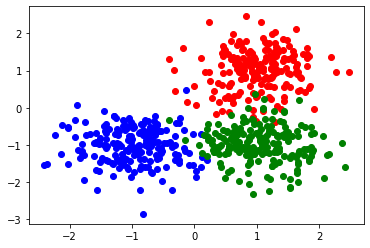

In [145]:
plt.scatter(X[0:int(num_patterns/3),0], X[0:int(num_patterns/3),1], color='red')
plt.scatter(X[int(num_patterns/3): int(2*num_patterns/3),0], X[int(num_patterns/3): int(2*num_patterns/3),1], color='blue')
plt.scatter(X[int(2*num_patterns/3): int(num_patterns),0], X[int(2*num_patterns/3): int(num_patterns),1], color='green')

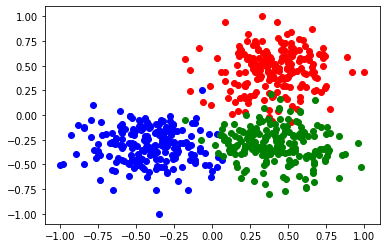

In [146]:
#X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X = 2*((X - X.min(0)) / X.ptp(0)) -1

plt.scatter(X[0:int(num_patterns/3),0], X[0:int(num_patterns/3),1], color='red')
plt.scatter(X[int(num_patterns/3): int(2*num_patterns/3),0], X[int(num_patterns/3): int(2*num_patterns/3),1], color='blue')
plt.scatter(X[int(2*num_patterns/3): int(num_patterns),0], X[int(2*num_patterns/3): int(num_patterns),1], color='green')

In [147]:
W1 = np.random.rand(num_features, num_hidden_neurons) * np.sqrt(1/(num_features + num_hidden_neurons +1)) 
Bias1 = np.random.rand(1, num_hidden_neurons) * np.sqrt(1/(num_features + num_hidden_neurons +1)) 
W2 = np.random.rand(num_hidden_neurons, num_classes) * np.sqrt(1/(num_hidden_neurons +1+num_classes)) 
Bias2 = np.random.rand(1, num_classes) * np.sqrt(1/(num_hidden_neurons +1+num_classes))

In [148]:
N = 500  # Num iterations
learning_rate = 10e-4
def sigm(x):
    x2 = np.clip(x, -8, 8)
    return  1/(1 + np.exp(-x2))
       
def softmax(x):
    expA = np.exp(x)
    return expA / expA.sum(axis=1, keepdims=True)

def CCR(out, target):
    return np.sum(np.argmax(out, axis=1).reshape((-1,1)))/ target.shape[0]
    

In [149]:
acc_error = []
precision = []
for i in range(N):
    #calculate output
    LL1 = X.dot(W1) + Bias1
    L1 = sigm(LL1)
    #print(L1)
    L2 = L1.dot(W2) + Bias2
    output = softmax(L2)
    
    # calculate error
    error = np.sum(-Y_hot * np.log(output)) /  num_patterns
    acc_error.append(error)
    accr = CCR(output, Y)
    precision.append(accr)

    #calculate Gradients
    W1_grad = W1 * 0
    Bias1_grad = Bias1 * 0
    W2_grad = W2 * 0
    Bias2_grad = Bias2 * 0

    cross_entropy_grad =  output - Y_hot    

    W2_grad =  np.transpose(np.transpose(cross_entropy_grad).dot(L1))       
    Bias2_grad = cross_entropy_grad.sum(axis=0)  
    
    W1_grad = np.transpose(np.transpose(cross_entropy_grad.dot(np.transpose(W2)) *L1*(1-L1)).dot(X)) 
    Bias1_grad = np.transpose(np.transpose(cross_entropy_grad.dot(np.transpose(W2)) *L1*(1-L1))).sum(axis=0) 

    #update weights
    W1 -= learning_rate * W1_grad
    Bias1 -=  learning_rate * Bias1_grad
    W2 -= learning_rate * W2_grad
    Bias2 -= learning_rate * Bias2_grad


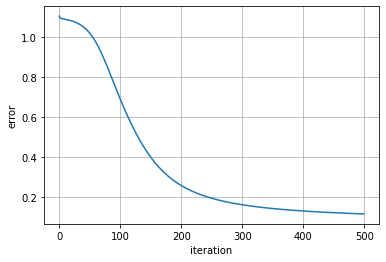

In [150]:
plt.plot(range(N), acc_error)
plt.grid()
plt.xlabel('iteration')
plt.ylabel('error')
plt.show()

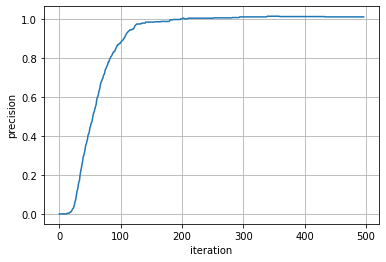

In [161]:

plt.plot(range(N-3), precision[3::])
plt.grid()
plt.xlabel('iteration')
plt.ylabel('precision')
plt.show()